In [1]:
#!pip install numpy pandas matplotlib
#!pip install seaborn plotly
#!jupyter labextension list
#!jupyter labextension install plotlywidget
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyterlab-plotly
#!pip install wordcloud
#!pip install nltk

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re

# Baixar stopwords do nltk (caso necessário)
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/marcio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('trump_tweets.csv',index_col='Unnamed: 0')
df.head(3).T

0  \
created_at                               2009-05-04 18:54:25+00:00   
favorited_count                                              717.0   
full_text        Be sure to tune in and watch Donald Trump on L...   
handle                                             realDonaldTrump   
hashtags                                                       NaN   
index                                                          0.0   
mentions                                                       NaN   
month                                                            5   
retweet_count                                                487.0   
sentiment                                                      0.6   
urls                                                            []   
year                                                          2009   

                                                                 1  \
created_at                               2009-05-05 01:00:10+00:00   
favorited_count                                              299.0   
full_text        Donald Trump will be appearing on The View tom...   
handle                                             realDonaldTrump   
hashtags                                                       NaN   
index                                                          0.0   
mentions                                                       NaN   
month                                                            5   
retweet_count                                                 35.0   
sentiment                                                      0.1   
urls                                                            []   
year                                                          2009   

                                                                 2  
created_at                               2009-05-08 13:38:08+00:00  
favorited_count                                               15.0  
full_text        Donald Trump reads Top Ten Financial Tips on L...  
handle                                             realDonaldTrump  
hashtags                                                       NaN  
index                                                          0.0  
mentions                                                       NaN  
month                                                            5  
retweet_count                                                 12.0  
sentiment                                                      0.8  
urls                                                            []  
year                                                          2009

In [91]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36965 entries, 0 to 36964
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       36965 non-null  datetime64[ns, UTC]
 1   favorited_count  36965 non-null  float64            
 2   full_text        36965 non-null  object             
 3   handle           36965 non-null  object             
 4   hashtags         5079 non-null   object             
 5   index            34848 non-null  float64            
 6   mentions         20093 non-null  object             
 7   month            36965 non-null  int64              
 8   retweet_count    36965 non-null  float64            
 9   sentiment        36965 non-null  float64            
 10  urls             36965 non-null  object             
 11  year             36965 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(5)
memory usage: 3.7+ M

In [4]:
df.head().T

0  \
created_at                               2009-05-04 18:54:25+00:00   
favorited_count                                              717.0   
full_text        Be sure to tune in and watch Donald Trump on L...   
handle                                             realDonaldTrump   
hashtags                                                       NaN   
index                                                          0.0   
mentions                                                       NaN   
month                                                            5   
retweet_count                                                487.0   
sentiment                                                      0.6   
urls                                                            []   
year                                                          2009   

                                                                 1  \
created_at                               2009-05-05 01:00:10+00:00   
favorited_count                                              299.0   
full_text        Donald Trump will be appearing on The View tom...   
handle                                             realDonaldTrump   
hashtags                                                       NaN   
index                                                          0.0   
mentions                                                       NaN   
month                                                            5   
retweet_count                                                 35.0   
sentiment                                                      0.1   
urls                                                            []   
year                                                          2009   

                                                                 2  \
created_at                               2009-05-08 13:38:08+00:00   
favorited_count                                               15.0   
full_text        Donald Trump reads Top Ten Financial Tips on L...   
handle                                             realDonaldTrump   
hashtags                                                       NaN   
index                                                          0.0   
mentions                                                       NaN   
month                                                            5   
retweet_count                                                 12.0   
sentiment                                                      0.8   
urls                                                            []   
year                                                          2009   

                                                                 3  \
created_at                               2009-05-08 20:40:15+00:00   
favorited_count                                               28.0   
full_text        New Blog Post: Celebrity Apprentice Finale and...   
handle                                             realDonaldTrump   
hashtags                                                       NaN   
index                                                          1.0   
mentions                                                       NaN   
month                                                            5   
retweet_count                                                 11.0   
sentiment                                                      0.5   
urls                                                            []   
year                                                          2009   

                                                                 4  
created_at                               2009-05-12 14:07:28+00:00  
favorited_count                                             1881.0  
full_text        "My persona will never be that of a wallflower...  
handle                                             realDonaldTrump  
hashtags                                                       NaN  
index  

In [93]:
#for column in df.columns:
 #   print(f'Columns: {column} --> Unique Values: {df[column].unique()}')
df.isnull().sum()/df.shape[0]
#df.columns.to_list()

created_at         0.000000
favorited_count    0.000000
full_text          0.000000
handle             0.000000
hashtags           0.862600
index              0.057270
mentions           0.456432
month              0.000000
retweet_count      0.000000
sentiment          0.000000
urls               0.000000
year               0.000000
dtype: float64

In [6]:
#Imprime o mais antigo e o mais recente tweet do Donald Trump
print(f'Primeiro tweet: {df.created_at.min()} \n Último Tweet: {df.created_at.max()}')

Primeiro tweet: 2009-05-04 18:54:25+00:00 
 Último Tweet: 2019-07-04 13:05:17+00:00


188                 EvanForSI
235                TrumpRoast
236                TrumpRoast
237                TrumpRoast
239                TrumpRoast
                 ...         
36881    DemDebate, MAGA, KAG
36892               G20Summit
36896          G20OsakaSummit
36902          G20OsakaSummit
36941         SaluteToAmerica
Name: hashtags, Length: 5079, dtype: object


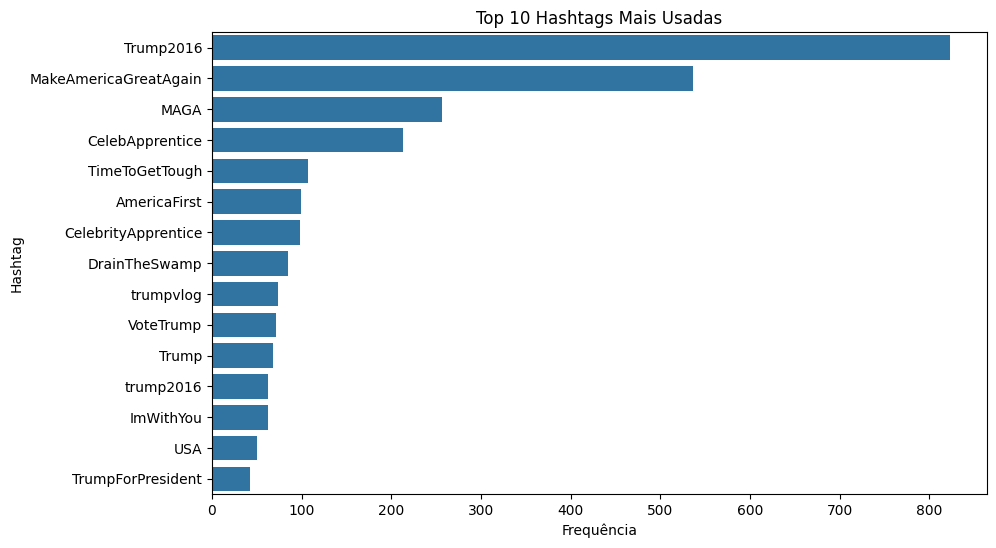

In [7]:
from collections import Counter

hashtags = df['hashtags'][df['hashtags'].notnull()]
print(hashtags)

# Contar hashtags
all_hashtags = [hashtag.strip() for sublist in hashtags for hashtag in sublist.split(',')]
#lista_separada = [item.strip() for sublist in lista for item in sublist.split(',')]

hashtag_counts = Counter(all_hashtags)

# Top 10 hashtags mais comuns
top_hashtags = dict(hashtag_counts.most_common(15))

# Plotar as hashtags
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_hashtags.values()), y=list(top_hashtags.keys()))
plt.title('Top 10 Hashtags Mais Usadas')
plt.xlabel('Frequência')
plt.ylabel('Hashtag')
plt.show()


['IvankaTrump', 'bretmichaels', 'hollyrpeete', 'kingsthings', 'SnoopDogg', 'ItsTheSituation', 'SethMacFarlane', 'comedy', 'realjeffreyross', 'whitney', 'LisaLampanelli', 'ComedyCentral', 'ComedyCentral', 'ShouldTrumpRun', 'GMA', 'TODAYshow', 'meredithvieira', 'The_Choirboy', 'Shampa525', 'mcleeoo', 'The_Impetuous', 'rdercjr', 'danmcisaac', 'FoxNews', 'TODAYshow', 'GMA', 'DonaldJTrumpJr', 'IvankaTrump', 'EricTrump', 'khfritch', 'DonaldJTrumpJr', 'IvankaTrump', 'EricTrump', 'oreillyfactor', 'foxandfriends', 'ApprenticeNBC', 'foxandfriends', 'TheRealMissUSA', 'SarahPalinUSA', 'foxandfriends', 'foxandfriends', 'GolfMagazine', 'EricTrump', 'BarackObama', 'obama', 'obama', 'obama', 'MacMiller', 'BarackObama', 'BarackObama', 'BarackObama', 'TheRealTeenUSA', 'BarackObama', 'marcorubio', 'BarackObama', 'BarackObama', 'BarackObama', 'EricCantor', 'BarackObama', 'gretawire', 'BarackObama', 'BarackObama', 'QVC', 'KarlRove', 'CrossroadsGPS', 'QVC', 'BarackObama', 'BarackObama', 'BarackObama', 'Amer

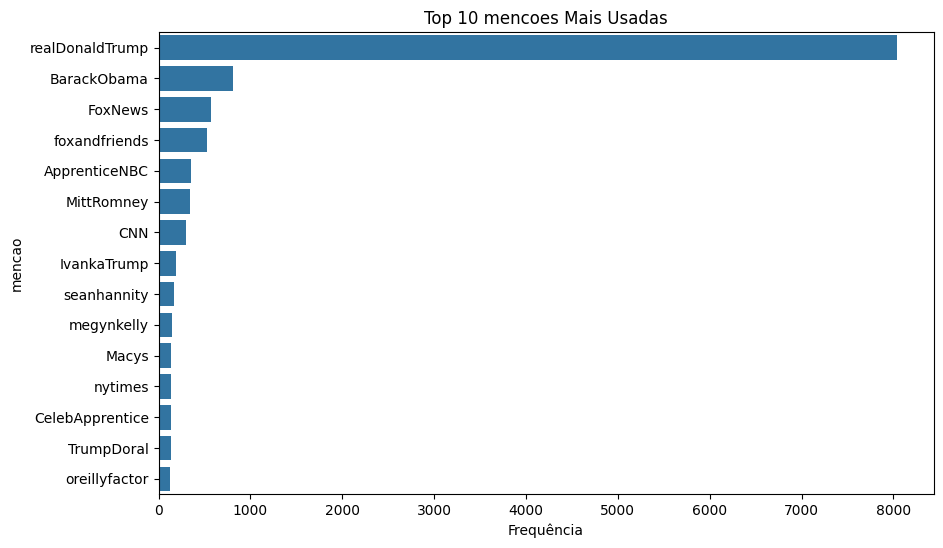

In [8]:
mencoes = df['mentions'][df['mentions'].notnull()]

# Contar mencoes
all_mencoes = [mencao.strip() for sublist in mencoes for mencao in sublist.split(',')]
print(all_mencoes)
mencao_counts = Counter(all_mencoes)

# Top 10 mencoes mais comuns
top_mencoes = dict(mencao_counts.most_common(15))

# Plotar as mencoes
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_mencoes.values()), y=list(top_mencoes.keys()))
plt.title('Top 10 mencoes Mais Usadas')
plt.xlabel('Frequência')
plt.ylabel('mencao')
plt.show()


In [9]:
df.favorited_count.describe()

count     36965.000000
mean      17913.304883
std       35989.476510
min           0.000000
25%          27.000000
50%         170.000000
75%       13148.000000
max      591115.000000
Name: favorited_count, dtype: float64

In [10]:
df.describe()

favorited_count         index         month  retweet_count  \
count     36965.000000  34848.000000  36965.000000   36965.000000   
mean      17913.304883     10.888745      6.509563    4651.939970   
std       35989.476510     10.376171      3.439869    9485.286324   
min           0.000000      0.000000      1.000000       0.000000   
25%          27.000000      3.000000      4.000000      23.000000   
50%         170.000000      8.000000      6.000000     220.000000   
75%       13148.000000     16.000000     10.000000    4853.000000   
max      591115.000000     50.000000     12.000000  335794.000000   

          sentiment          year  
count  36965.000000  36965.000000  
mean       0.095534   2014.634763  
std        0.389626      2.065767  
min       -0.900000   2009.000000  
25%       -0.100000   2013.000000  
50%        0.000000   2014.000000  
75%        0.400000   2016.000000  
max        0.900000   2019.000000

In [11]:
df.handle.unique()
df.hashtags.unique()
df.mentions.value_counts()
df.retweet_count.value_counts()

retweet_count
1.0        530
2.0        528
12.0       486
15.0       470
13.0       461
          ... 
6984.0       1
14317.0      1
17822.0      1
17330.0      1
22024.0      1
Name: count, Length: 11001, dtype: int64

In [12]:
selected_columns = ['created_at','favorited_count','full_text',	'retweet_count','sentiment']
dftrump = df[selected_columns]
dftrump.head()

created_at  favorited_count  \
0  2009-05-04 18:54:25+00:00            717.0   
1  2009-05-05 01:00:10+00:00            299.0   
2  2009-05-08 13:38:08+00:00             15.0   
3  2009-05-08 20:40:15+00:00             28.0   
4  2009-05-12 14:07:28+00:00           1881.0   

                                           full_text  retweet_count  sentiment  
0  Be sure to tune in and watch Donald Trump on L...          487.0        0.6  
1  Donald Trump will be appearing on The View tom...           35.0        0.1  
2  Donald Trump reads Top Ten Financial Tips on L...           12.0        0.8  
3  New Blog Post: Celebrity Apprentice Finale and...           11.0        0.5  
4  "My persona will never be that of a wallflower...         1410.0        0.0

In [101]:
dftrump['ano'] = dftrump.created_at.dt.year
dftrump['mes'] = dftrump.created_at.dt.month
dftrump['dia'] = dftrump.created_at.dt.day
dftrump['ano_mes'] = dftrump['created_at'].dt.to_period('M')
dftrump.head()
dftrump.to_csv('dftrump.csv')

/tmp/ipykernel_5894/2729127891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrump['ano'] = dftrump.created_at.dt.year
/tmp/ipykernel_5894/2729127891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrump['mes'] = dftrump.created_at.dt.month
/tmp/ipykernel_5894/2729127891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [102]:
dftrump['ano'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int32)

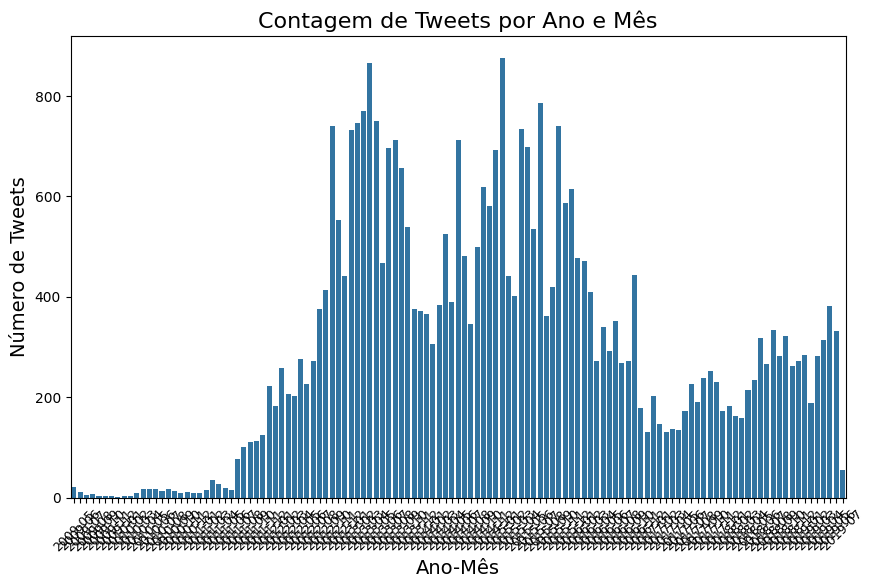

In [103]:
contagem_ano_mes = dftrump.groupby('ano_mes')['full_text'].count().reset_index(name='num_tweets_mes')

# Plotando a contagem com Seaborn e Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(data=contagem_ano_mes, x='ano_mes', y='num_tweets_mes')
#sns.lineplot(data=contagem, x='ano_mes', y='num_tweets', marker='o', linewidth=2)

# Adicionando título e rótulos
plt.title('Contagem de Tweets por Ano e Mês', fontsize=16)
plt.xlabel('Ano-Mês', fontsize=14)
plt.ylabel('Número de Tweets', fontsize=14)

# Rotacionando os rótulos do eixo X, se necessário
plt.xticks(rotation=45,fontsize=9)

# Exibindo o gráfico
plt.show()

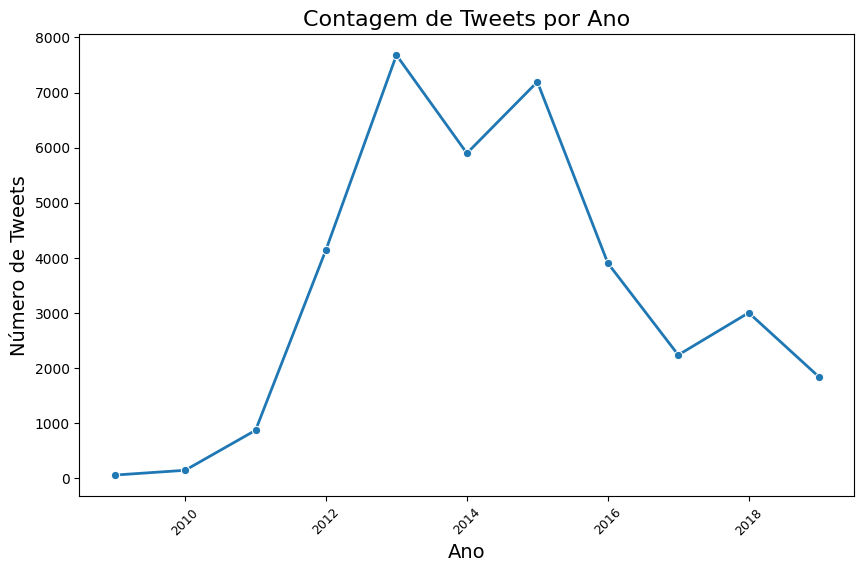

In [104]:
contagem_ano = dftrump.groupby('ano')['full_text'].count().reset_index(name='num_tweets_ano')
#contagem_ano
# Plotando a contagem com Seaborn e Matplotlib
plt.figure(figsize=(10, 6))
#sns.barplot(data=contagem_ano, x='ano', y='num_tweets_ano')
sns.lineplot(data=contagem_ano, x='ano', y='num_tweets_ano', marker='o', linewidth=2)

# Adicionando título e rótulos
plt.title('Contagem de Tweets por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Tweets', fontsize=14)

# Rotacionando os rótulos do eixo X, se necessário
plt.xticks(rotation=45,fontsize=9)

# Exibindo o gráfico
plt.show()

In [105]:
fig = px.line(contagem_ano, x='ano',
              y='num_tweets_ano',
              title = 'Contagem de tweets por ano',
              markers=True,
              labels={'ano': 'Ano', 'num_tweets_ano': 'Numero de tweets por ano'} )
fig.update_layout(
    xaxis=dict(tickangle=-45,
               tickfont=dict(size=12),
               title=dict(font=dict(size=20))),  # Rotaciona os rótulos do eixo X e ajusta o tamanho da fonte
    yaxis=dict(tickfont=dict(size=12),
               title=dict(font=dict(size=20)),
               ),
    title_font=dict(size=20)
)

fig.show()

In [106]:
dftrump.head()

created_at  favorited_count  \
0 2009-05-04 18:54:25+00:00            717.0   
1 2009-05-05 01:00:10+00:00            299.0   
2 2009-05-08 13:38:08+00:00             15.0   
3 2009-05-08 20:40:15+00:00             28.0   
4 2009-05-12 14:07:28+00:00           1881.0   

                                           full_text  retweet_count  \
0  Be sure to tune in and watch Donald Trump on L...          487.0   
1  Donald Trump will be appearing on The View tom...           35.0   
2  Donald Trump reads Top Ten Financial Tips on L...           12.0   
3  New Blog Post: Celebrity Apprentice Finale and...           11.0   
4  "My persona will never be that of a wallflower...         1410.0   

   sentiment   ano  mes  dia  ano_mes  
0        0.6  2009    5    4  2009-05  
1        0.1  2009    5    5  2009-05  
2        0.8  2009    5    8  2009-05  
3        0.5  2009    5    8  2009-05  
4        0.0  2009    5   12  2009-05

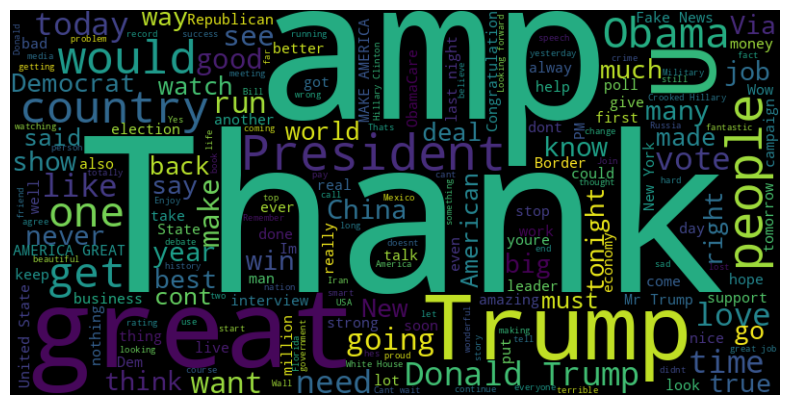

In [107]:
# Função para processar os tweets e gerar uma nuvem de palavras
def gerar_nuvem_palavras(df, coluna_texto, largura=800, altura=400, fundo='black'):
    # Combina todos os tweets em um único texto
    texto = " ".join(tweet for tweet in df[coluna_texto].dropna())
    
    # Pré-processamento: remove URLs, menções, hashtags e símbolos especiais
    texto_limpo = re.sub(r'http\S+|www.\S+|@\w+|#\w+|[^a-zA-Z\s]', '', texto)
    
    # Define as stopwords
    stop_words = set(stopwords.words('english'))
    
    # Gera a nuvem de palavras
    wordcloud = WordCloud(
        stopwords=stop_words,
        background_color=fundo,
        width=largura,
        height=altura,
        colormap='viridis'
    ).generate(texto_limpo)
    
    # Plota a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Exemplo de uso
# Supondo que 'df' tenha uma coluna chamada 'tweets'
# df = pd.read_csv('tweets.csv')  # Se estiver carregando de um arquivo CSV
gerar_nuvem_palavras(dftrump, 'full_text')

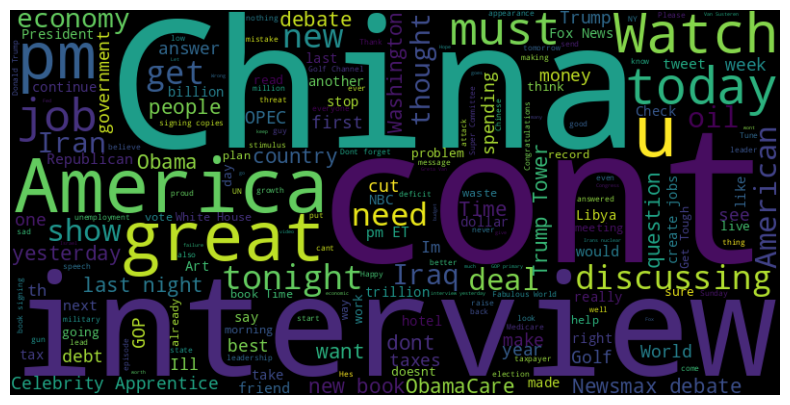

<Figure size 640x480 with 0 Axes>

In [117]:
# Função para processar os tweets e gerar uma nuvem de palavras
def gerar_nuvem_palavras(df, coluna_texto, largura=800, altura=400, fundo='black', year = None):
    # Combina todos os tweets em um único texto
    if year != None:
        texto = " ".join(tweet for tweet in df[coluna_texto][df['ano'] == year].dropna())
    else:
        texto = " ".join(tweet for tweet in df[coluna_texto].dropna())
    
    # Pré-processamento: remove URLs, menções, hashtags e símbolos especiais
    texto_limpo = re.sub(r'http\S+|www.\S+|@\w+|#\w+|[^a-zA-Z\s]', '', texto)
    
    # Define as stopwords
    stop_words = set(stopwords.words('english'))
    
    # Gera a nuvem de palavras
    wordcloud = WordCloud(
        stopwords=stop_words,
        background_color=fundo,
        width=largura,
        height=altura,
        colormap='viridis'
    ).generate(texto_limpo)
    
    # Plota a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    plt.savefig(f'{ano}.png')

# Exemplo de uso
# Supondo que 'df' tenha uma coluna chamada 'tweets'
# df = pd.read_csv('tweets.csv')  # Se estiver carregando de um arquivo CSV
gerar_nuvem_palavras(dftrump, 'full_text',year = 2011)

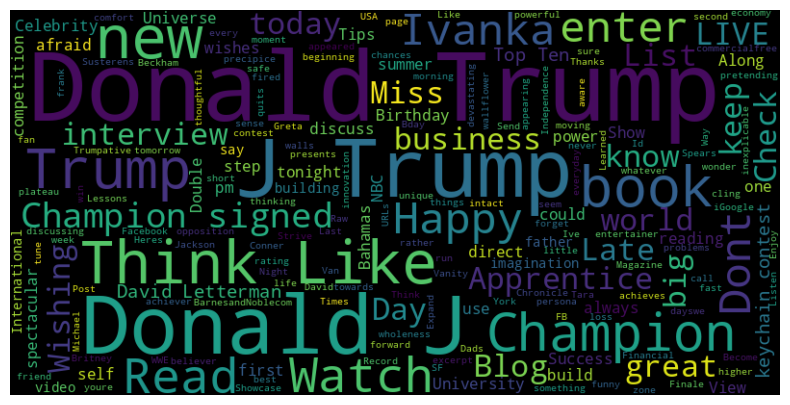

<Figure size 640x480 with 0 Axes>

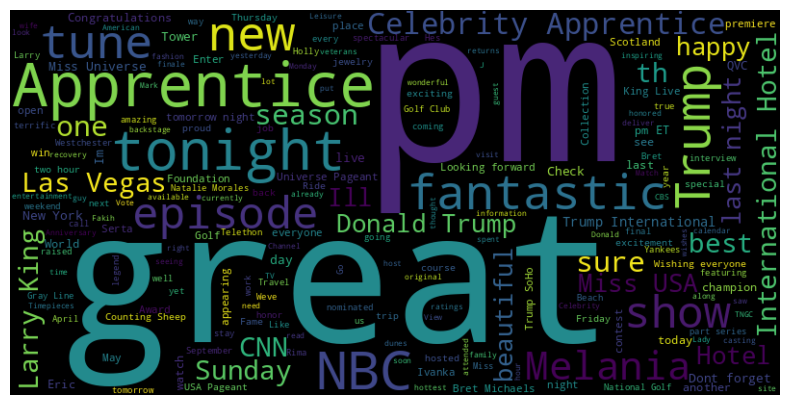

<Figure size 640x480 with 0 Axes>

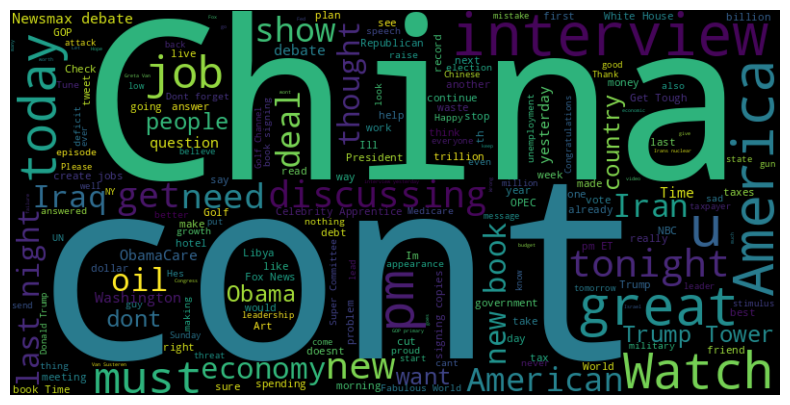

<Figure size 640x480 with 0 Axes>

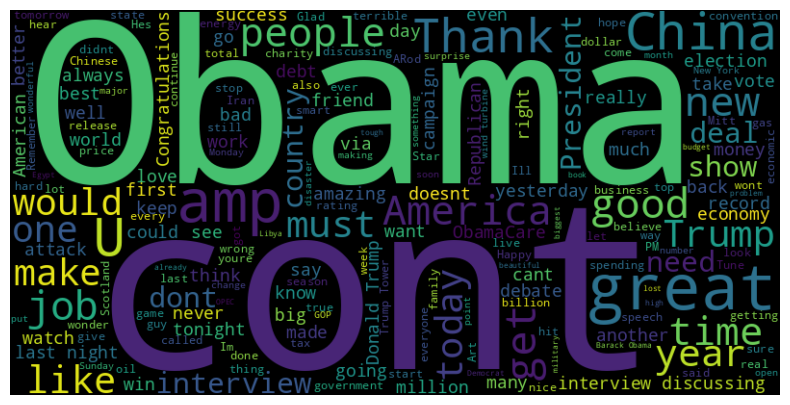

<Figure size 640x480 with 0 Axes>

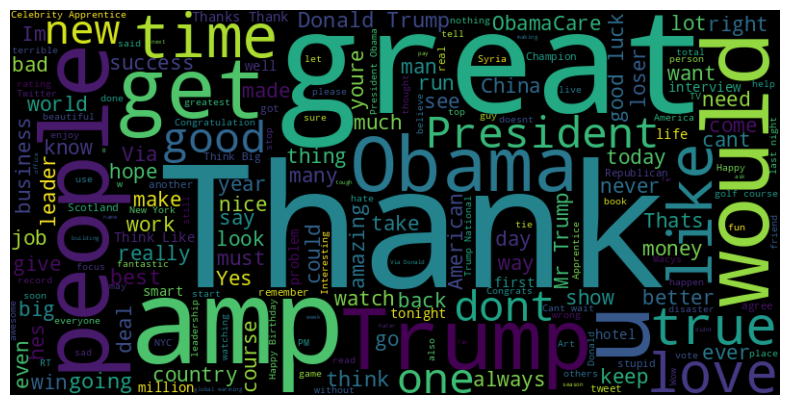

<Figure size 640x480 with 0 Axes>

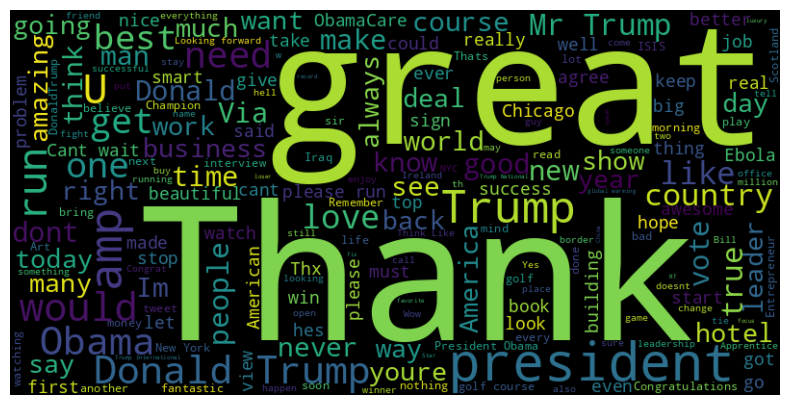

<Figure size 640x480 with 0 Axes>

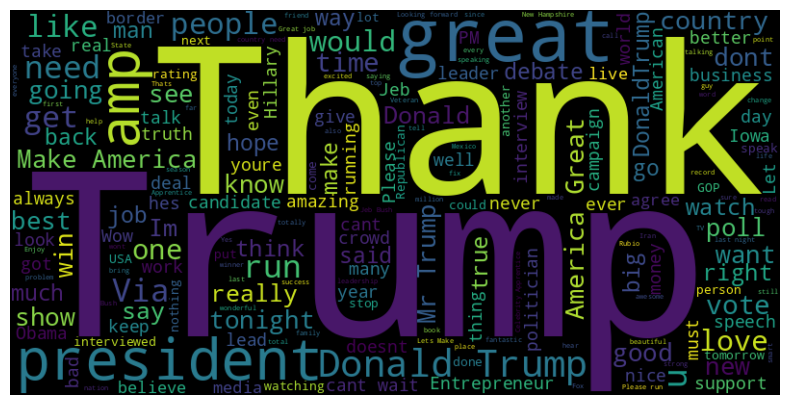

<Figure size 640x480 with 0 Axes>

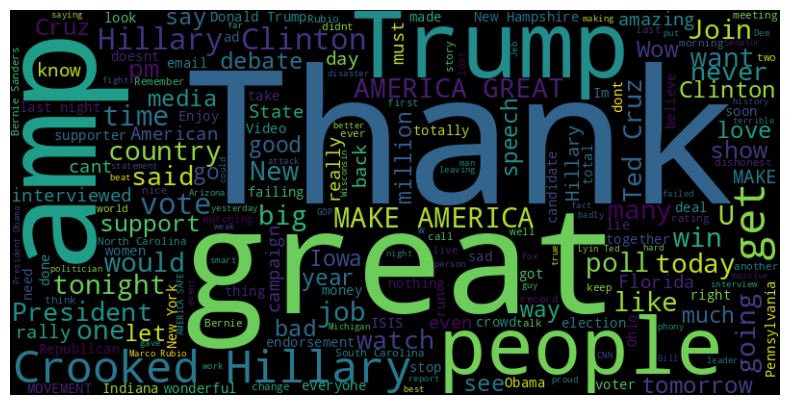

<Figure size 640x480 with 0 Axes>

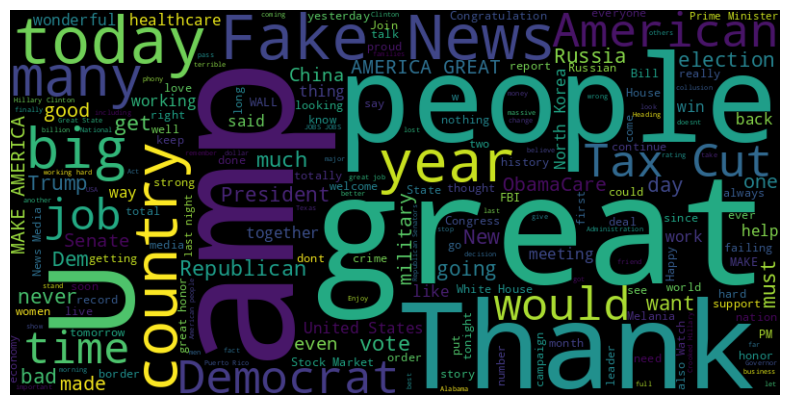

<Figure size 640x480 with 0 Axes>

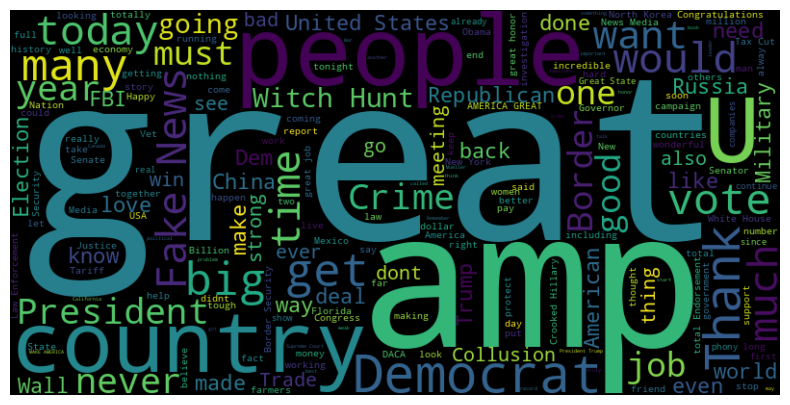

<Figure size 640x480 with 0 Axes>

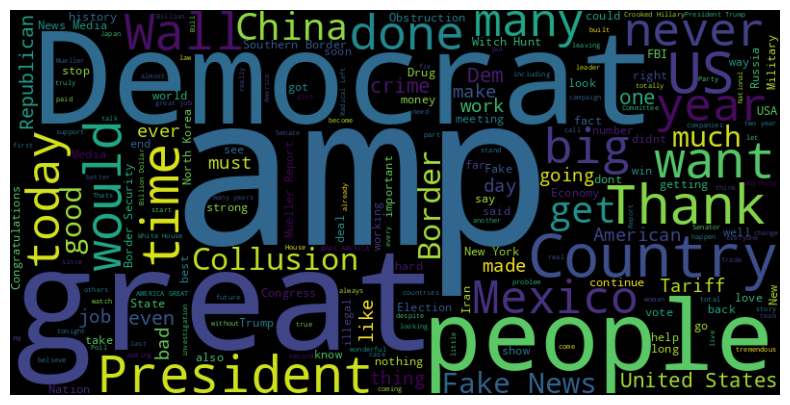

<Figure size 640x480 with 0 Axes>

In [118]:
for ano in range(2009,2020):
    gerar_nuvem_palavras(dftrump, 'full_text',year = ano)
    

In [109]:
dftrump['full_text'][dftrump['ano'] == 2010]

56     Celebrity Apprentice returns to NBC, Sunday, 3...
57     Trump Tycoon App for iPhone & iPod Touch - It'...
58     from Donald Trump: "I saw Lady Gaga last night...
59     Golf Channel & Donald Trump's World of Golf ho...
60     Superbowl Sunday is a great American tradition...
                             ...                        
194    ...Trump International Hotel Las Vegas, and Tr...
195    I'll be appearing on Larry King Live for his f...
196    Don't forget to watch Larry King tonight, CNN ...
197        Wishing everyone a very Happy Holiday season!
198    WIshing everyone a happy, healthy and prospero...
Name: full_text, Length: 143, dtype: object

In [110]:
def select_top5_tweets(df, year = None):
    if year == None:
        return df[['full_text','sentiment','ano']].nlargest(5,columns='sentiment')
    else:
        return df[['full_text','sentiment','ano']][df.ano == year].nlargest(5,columns='sentiment')
    
def select_low5_tweets(df, year = None):
    if year == None:
        return df[['full_text','sentiment','ano']].nsmallest(5,columns='sentiment')
    else:
        return df[['full_text','sentiment','ano']][df.ano == year].nsmallest(5,columns='sentiment')



In [111]:
for ano in range(2009,2020):
    print(select_top5_tweets(dftrump,ano))

#print(select_top5_tweets(dftrump))

                                            full_text  sentiment   ano
39  Ivanka is now on Twitter - You can follow her ...        0.9  2009
53  Wishing you and yours a very Happy and Bountif...        0.9  2009
2   Donald Trump reads Top Ten Financial Tips on L...        0.8  2009
45  Read Donald Trump's Top Ten Tips for Success: ...        0.8  2009
51  --Work has begun, ahead of schedule, to build ...        0.7  2009
                                             full_text  sentiment   ano
88   Our thoughts and prayers remain with Bret Mich...        0.9  2010
95   We're all very happy to hear of Bret Michael's...        0.9  2010
104  The ratings for the Celebrity Apprentice were ...        0.9  2010
107  The Dunes here are amazing, and  they're how I...        0.9  2010
187  My best wishes to everyone for a Happy Thanksg...        0.9  2010
                                             full_text  sentiment   ano
207  Don't miss my Fabulous World of Golf now in it...        0.9  201

In [112]:
for ano in range(2009,2020):
    print(select_low5_tweets(dftrump,ano))

#print(select_low5_tweets(dftrump))

                                            full_text  sentiment   ano
20  "You have to know when to call it quits and wh...       -0.2  2009
23  Last week to enter the "Think Like A Champion"...       -0.2  2009
46  "A lot of people have imagination, but can't e...       -0.2  2009
18  "Your higher self is in direct opposition to y...       -0.1  2009
4   "My persona will never be that of a wallflower...        0.0  2009
                                             full_text  sentiment   ano
129  The new edition of The Apprentice will be on T...       -0.2  2010
61   Donald Trump appearing today on CNN Internatio...        0.0  2010
62   Donald Trump appeared on the final episode of ...        0.0  2010
71   The original Apprentice is coming back--do you...        0.0  2010
72   The NYC casting call for The Apprentice is thi...        0.0  2010
                                             full_text  sentiment   ano
374  Fiscal mismanagement of cash costing US Taxpay...       -0.9  201